In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import timedelta

In [15]:
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-ivashchenko/first_project/olist_customers_dataset (2).csv')
items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-ivashchenko/first_project/olist_order_items_dataset (1).csv')
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-ivashchenko/first_project/olist_orders_dataset (1).csv')

In [16]:
orders_and_cust = customers.merge(orders, how = 'inner', on = 'customer_id')
orders_unique_id = orders.merge(customers, on='customer_id')
orders_items = orders.merge(items)
orders_cust_items = orders_and_cust.merge(items)

In [17]:
 #Посмотрим на данные 
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [18]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [19]:
customers.shape

(99441, 5)

In [20]:
 orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [21]:
 orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [22]:
 orders.shape

(99441, 8)

In [23]:
 items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [24]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [25]:
 items.shape

(112650, 7)

In [26]:
#как распределяются заказы по статусам
status = orders.groupby("order_status", as_index = False).agg({"customer_id": "count"})
status

,order_status,customer_id
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


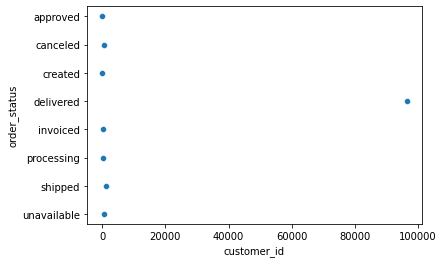

In [27]:
# как это выглядит
sns.scatterplot(data=status, x="customer_id", y="order_status")

In [28]:
 #макс количество позиций в одном чеке
orders_cust_items.order_item_id.nunique()

21

### 1)Найдем количетсво пользователей, которые совершили покупку только один раз
 Рассмотрим какие статусы заказа соответсвуют требованию "покупка совершена":   
1.delivered   - доставлен       
2.shipped     - отправлен   
3.canceled    - отменен     
4.unavailable - недоступен     
5.invoiced    - счет выставлен      
6.processing  - в процессе         
7.created     - заказ создан       
8.approved    - одобрен         
Нас точно удовлетворяют статусы "delivered","shipped"
Статус "processing" не столь одназначен, он может быть как принят в дальнейшем, так и отклонен. Мы не будем его учитывать.
Все оставшие статусы однозначно не подходят под наши требования

In [29]:
#Если бы мы знали чуть больше о данном бизнесе, возможно, это бы позволило сделать иные выводы о статусах и цифры были бы немного другими. 

In [30]:
#Смотрим на то, какие статусы заказов вообще есть
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [31]:
 # Всего уникальных пользователей
len(orders_and_cust['customer_unique_id'].unique())

96096

In [32]:
 # всего уникльных заказов
len(orders_and_cust['customer_id'].unique())

99441

In [33]:
# всего уникальных пользователей,совершивших лишь 1 заказ, с учетом выборки по статусу заказа (доставлен и отправлен)
just_one_purchase = orders_and_cust.query("order_status == ['shipped', 'delivered']") \
                                .groupby("customer_unique_id", as_index=False) \
                                .agg({"customer_unique_id": "count"}) \
                                .query("customer_unique_id == 1") \
                                .value_counts('customer_unique_id')
just_one_purchase

customer_unique_id
1    91538
dtype: int64

In [34]:
#Сколько в процентах
91538/96096*100

95.25682650682651

In [35]:
#Полагаю, что если мы изменим то,что считать//не считат покупкой процент того, что клиенты не делали заказ больше 1 раза - возрастет

### 2) Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)
 Причины по которым заказ не был доставлен указаны в самих формалировках статусов заказа

In [36]:
#Не доставленные заказы вообще
orders_not_delivered = orders.query ("order_status != ['shipped', 'delivered']") 

In [37]:
#Создадим ДФ с недоставленными заказами, без указанной даты"order_status == ['shipped', 'delivered']")
not_delivered = orders[orders.order_delivered_customer_date.isna()].query("order_status != ['shipped', 'delivered']")
not_delivered.shape

(1850, 8)

In [38]:
#Нас просят работать с месяцами, поработаем с формаом даты
not_delivered['order_purchase_timestamp'] = pd.to_datetime(not_delivered.order_purchase_timestamp, format='%Y-%m-%d')
not_delivered.order_purchase_timestamp = not_delivered.order_purchase_timestamp.dt.strftime('%Y-%m')

### Поработаем с очевидными отмененными статусами. А именно:canceled и unavailable (ну они уж точно)

In [39]:
canceled_unavailable = not_delivered.query('order_status == ["canceled", "unavailable"]') \
                      .groupby(['order_purchase_timestamp', 'order_status'], as_index=False) \
                      .agg({'order_id': 'count'}).rename(columns={'order_id': 'count_order_id'})


#Почему бы не показать всем, что можно и через сводную
canceled_unavailable_pivot = canceled_unavailable.pivot(index=['order_purchase_timestamp'], 
                            columns='order_status', values='count_order_id')

canceled_unavailable_pivot.describe()

order_status,canceled,unavailable
count,24.000000,21.000000
mean,25.791667,29.000000
std,19.117438,20.825465
min,2.000000,4.000000
25%,15.750000,10.000000
50%,22.000000,30.000000
75%,30.000000,42.000000
max,84.000000,84.000000


In [40]:
#Просто напишем (ведь и принт мы тоже умеем)
mean_canceled = round(canceled_unavailable_pivot.canceled.mean(), 0)
mean_unavailable = round(canceled_unavailable_pivot.unavailable.mean(), 0)
print(f'{mean_canceled} причина: отмена')
print(f'{mean_unavailable} причина: неизвестна')

26.0 причина: отмена
29.0 причина: неизвестна


In [41]:
#Это нам пригодится
26+29 

55

In [42]:
 canceled_unavailable.head()

,order_purchase_timestamp,order_status,count_order_id
0,2016-09,canceled,2
1,2016-10,canceled,19
2,2016-10,unavailable,7
3,2017-01,canceled,3
4,2017-01,unavailable,10


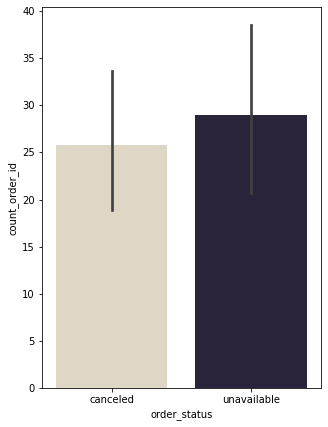

In [43]:
#Визуализируем полученные данные (1)
plt.figure(figsize=(5,7))
ax = sns.barplot(data=canceled_unavailable, y='count_order_id', x='order_status', palette = 'ch:s=-.2,r=.6')

### Можно было пойти немного иным путем, оттолкнувшить от первого задания, и считать невыполненными все заказы кроме 'shipped', 'delivered', тогда:

In [45]:
#Хотя можно поспорить тут на счет однозначности статуса 'shipped', но я все же не буду выводить его в результирующий график

In [46]:
#Недоставленное по каждой причине и по каждому месяцу
reasons_date = not_delivered.groupby(["order_purchase_timestamp", "order_status"]) \
             .agg({"customer_id": "count"}) 

In [47]:
#Среднее недоставленное, по всем причинам по месяцам и году
mean_not_del_by_date = reasons_date.groupby("order_purchase_timestamp")\
                                    .agg({'customer_id': 'mean'}) \
                                    .round()

In [48]:
# Среднее недоставленное за все время по причинам
mean_not_del_reason = reasons_date.groupby("order_status")\
                                  .agg({"customer_id": "mean"}) \
                                  .round() \
                                  .sort_values("customer_id") \
                                  .rename(columns={'customer_id':'avg'}) \
                                  .reset_index()
mean_not_del_reason

,order_status,avg
0,approved,1.0
1,created,2.0
2,invoiced,15.0
3,processing,16.0
4,canceled,26.0
5,unavailable,29.0


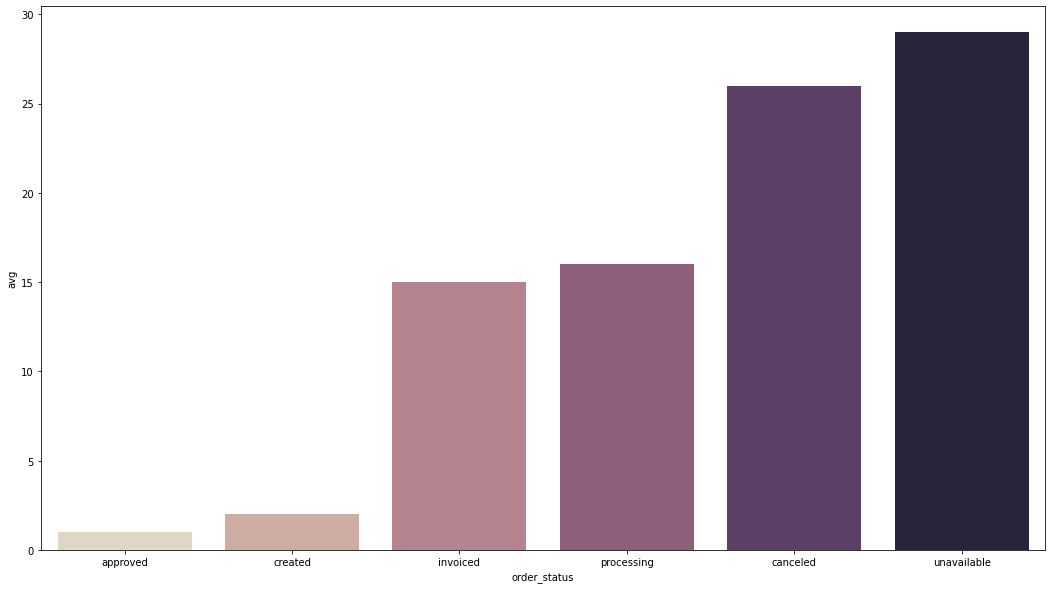

In [49]:
#Визуализируем полученные данные (2)
plt.figure(figsize=(18,10))
ax = sns.barplot(data=mean_not_del_reason, y='avg', x='order_status', palette = 'ch:s=-.2,r=.6')

In [50]:
mean_not_del_reason.avg.sum()

89.0

  ### Итог:
  если за невыполненные заказы мы считаем очевидные и однозначиные canceled и unavailable, то в среднем недоставляется 55 заказов                 
  если мы будем рассматриваь все варианты, кроме выбранных пометок в 1 задании, то получим, что в среднем не доставляется 89 заказов

### 3) По каждому товару определить, в какой день недели товар чаще всего покупается

In [51]:
#Возьмем объединенные таблицы, учтем только те заказы, которые были успешны (согласно нашим рассуждениям в 1 задании)
orders_items_success = orders_items.query("order_status == ['shipped', 'delivered']")

In [52]:
#Выделим дни недели в отдельную колонку (по "время создания заказа")
orders_items_success['week_day'] = pd.to_datetime(orders_items_success['order_purchase_timestamp']).dt.day_name()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
orders_items_success.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,week_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday


In [54]:
#Сортируем данные и находим максимальные значения среди product_id, с учетом дней недели
best_sell_days = orders_items_success \
    .groupby(["product_id", "week_day"], as_index=False) \
    .agg({"customer_id": "count"}) \
    .sort_values(by="customer_id", ascending=False) \
    .drop_duplicates(subset='product_id')
best_sell_days

,product_id,week_day,customer_id
15712,422879e10f46682990de24d770e7f83d,Wednesday,93
36020,99a4788cb24856965c36a24e339b6058,Monday,92
40505,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
19860,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
12842,368c6c730842d78016ad823897a372db,Friday,67
...,...,...,...
23715,643a4049ae3e6df63858575f28cd7b21,Friday,1
23717,643a66b1dc5dad3de6cb5a41549e72f1,Sunday,1
23719,643f86cfb81c8ef89293524c5cd78435,Thursday,1
23720,64436613065a92eedd50d29d4ec0cd43,Friday,1


### 4)Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [55]:
#Отберем по успешности заказа (согласно пункту 1)
successful_purchases_merge = orders_and_cust.query("order_status == ['shipped', 'delivered']")
successful_purchases_merge.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00


In [56]:
#добавим колонку
successful_purchases_merge['year_month']  = pd.to_datetime(successful_purchases_merge.order_approved_at, format='%Y-%m')
successful_purchases_merge.head(3)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-16 15:22:12
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-12 20:58:32
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05-20 16:19:10


In [57]:
# найдём кол-во всех покупок для каждого пользователя по месяцам
purchases_per_week = successful_purchases_merge.groupby(['customer_unique_id', 'year_month'], as_index=False) \
                                                .agg({'order_id': 'count'}) \
                                                .rename(columns={'order_id': 'sum_orders'}) \
                                                .sort_values('sum_orders', ascending=False)

In [58]:
# создадим колонку с кол-вом недель в месяце, необходимую для расчета
purchases_per_week['weeks_in_month'] = purchases_per_week.year_month.dt.days_in_month / 7
purchases_per_week.head()

,customer_unique_id,year_month,sum_orders,weeks_in_month
40670,6a80a86f478a93a5f4c7ba8db6441a6b,2017-07-26 17:35:21,3,4.428571
72304,bd8ee6a65c4d647953792da821444580,2017-11-30 13:31:19,2,4.285714
72999,bf59acdae64e9900fd93e4847baa1978,2017-10-07 14:07:24,2,4.428571
29838,4e3b6c25502ef69e5c5e54616bf67ed7,2017-03-09 10:38:32,2,4.428571
13473,23339103d82a054f9729b0554ce22e8c,2018-06-16 12:18:47,2,4.285714


In [59]:
#создадим колонку со средним кол-вом покупок в неделю (по месяцам) для каждого из пользователей
purchases_per_week['purchases_per_week_mean'] = purchases_per_week.sum_orders / purchases_per_week.weeks_in_month
purchases_per_week.year_month = purchases_per_week.year_month.dt.strftime('%Y-%m')

In [60]:
purchases_per_week.sort_values('purchases_per_week_mean', ascending=True)

,customer_unique_id,year_month,sum_orders,weeks_in_month,purchases_per_week_mean
97487,ffffd2657e2aad2907e67c3e9daecbeb,2017-05,1,4.428571,0.225806
38201,6409891d2f62a574d0f9c98931554ee0,2017-05,1,4.428571,0.225806
82999,d9a47dbf7021644cdac4ce1a3159307e,2017-12,1,4.428571,0.225806
82998,d9a46e8ca222c7571667818ee42979e9,2018-05,1,4.428571,0.225806
82997,d9a3f1b87c490cd812f22b9ccf1844ef,2018-03,1,4.428571,0.225806
...,...,...,...,...,...
22302,3a5b0d10ee72cefb504df217532a4e6a,2018-02,2,4.000000,0.500000
81048,d451891847b64bb4cf9a40e9cfe1c7a2,2017-02,2,4.000000,0.500000
86477,e2c483395f5aa739622936a3e826921d,2017-02,2,4.000000,0.500000
62647,a44b31b99d33ba6c128b857d28842ea8,2018-02,2,4.000000,0.500000


### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [61]:
#Берем только те данные, что нам нужны
cohort_analys = orders.merge(customers,
                     how='left',
                     on='customer_id') \
              .sort_values('order_purchase_timestamp')[['customer_unique_id', 'order_purchase_timestamp']]
cohort_analys.head()

,customer_unique_id,order_purchase_timestamp
4541,b7d76e111c89f7ebf14761390f0f7d17,2016-09-04 21:15:19
4396,4854e9b3feff728c13ee5fc7d1547e92,2016-09-05 00:15:34
10071,009b0127b727ab0ba422f6d9604487c7,2016-09-13 15:24:19
30710,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38
83078,0eb1ee9dba87f5b36b4613a65074337c,2016-10-02 22:07:52


In [62]:
#Напишем функцию сейчас, чтобы было легче позже
def retention_cohort(df, dates=None, users=None, monthly=True):
    
    # Добавляем даты первых покупок
    df = df.merge(df.drop_duplicates(subset=users) \
                    .rename(columns={dates: 'first_purchase'}),
                  how='left',
                  on=users)
    
    # Добавляем колонки с когортами, группируем по новым колонкам, считаем уникальные строки, оставляем только нужное для работы
    df = df.assign(cohort = df.first_purchase.dt.strftime('%Y-%m') if monthly 
                   else df.first_purchase.dt.strftime('%Y, неделя %W'),
                   lifetime = df[dates].dt.month - df.first_purchase.dt.month + 12*(df[dates].dt.year - df.first_purchase.dt.year) if monthly 
                   else df[dates].dt.week - df.first_purchase.dt.week + 53*(df[dates].dt.year - df.first_purchase.dt.year)) \
           .groupby(['cohort', 'lifetime'], 
                    as_index=False) \
           .agg({users: 'nunique'}) \
           .sort_values(['cohort', 'lifetime'])
    
    # Цепляем колонку с начальным кол-вом юзеров в когорте, с её помощью считаем retention
    df = df.merge(df[df.lifetime == 0].rename(columns={users: 'cohort_users'})[['cohort', 'cohort_users']],
                  how='left',
                  on='cohort')
    df['retention'] = df[users] / df.cohort_users
    
    # Форматируем таблицу
    df = df.pivot_table(index='cohort',
                        columns='lifetime',
                        values='retention',
                        aggfunc='sum')
    return df

In [63]:
cohort_analys.dtypes

customer_unique_id          object
order_purchase_timestamp    object
dtype: object

In [64]:
cohort_analys.order_purchase_timestamp = pd.to_datetime(cohort_analys.order_purchase_timestamp)

In [65]:
cohort_analys = retention_cohort(cohort_analys,
                         dates='order_purchase_timestamp',
                         users='customer_unique_id')
cohort_analys.head()

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003115,NaN,NaN,0.003115,NaN,0.003115,NaN,0.003115,NaN,0.003115,NaN,0.003115,0.006231,0.006231
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.003927,0.002618,0.001309,0.003927,0.001309,0.005236,0.001309,0.001309,NaN,0.003927,0.001309,0.007853,0.003927,0.001309,0.001309,0.002618,0.003927,0.001309,NaN
2017-02,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,0.002854,0.001712,0.001712,0.001142,0.000571,0.000571,0.002283,NaN,NaN


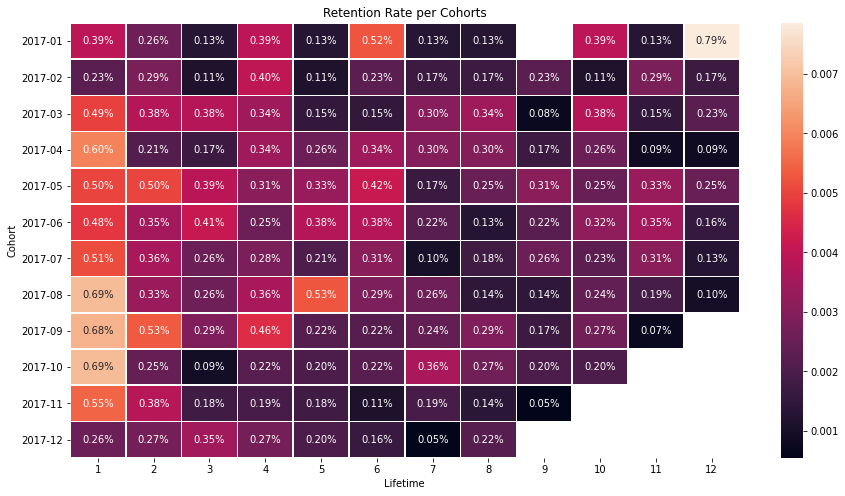

In [66]:
# Рисуем heatmap для retention когорт 2017ого года
sns.heatmap(cohort_analys.iloc[3:15, 1:13], 
            annot=True,
            fmt='.2%',
            linewidths=0.7, 
            linecolor='white')
plt.title('Retention Rate per Cohorts')
plt.ylabel('Cohort')
plt.xlabel('Lifetime')

plt.gcf().set_size_inches(15, 8)

### Наивысший retention rate на 3-ий месяц был у когорты пользователей, сделавших первую покупку в июне 2017 года; он составляет 0,41% от пользователей когорты.

 Наш сервис не для частых покупок или же он не столь хорош, как нам хотелось бы?

### 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

 R - время от последней покупки пользователя до текущей даты          
 F - суммарное количество покупок у пользователя за всё время           
 M - сумма покупок за всё время.      

In [67]:
# Выбираем дф
orders_rfm = orders_unique_id .query('order_status == "delivered"').dropna()
orders_rfm.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [68]:
# получим сумму каждого заказа
orders_price = items.groupby('order_id',as_index=False).agg({'price':'sum'})
orders_price.head()

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


In [69]:
 #добавим в основной дф столбец с ценой, посчитаной выше
orders_rfm = orders_rfm.merge(orders_price, on='order_id')
orders_rfm.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,19.90


In [70]:
# Сделаю табличку удобнее, откинув все ненужное
orders_rfm = orders_rfm.groupby(['order_id', 'customer_unique_id', 'order_approved_at'], as_index=False) \
                .agg({'price': 'sum'})
orders_rfm.head()

,order_id,customer_unique_id,order_approved_at,price
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 09:45:35,58.90
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 11:05:13,239.90
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:48:30,199.00
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:10:18,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 14:10:13,199.90


In [71]:
orders_rfm.order_approved_at = pd.to_datetime(orders_rfm.order_approved_at)

In [72]:
orders_rfm.dtypes

order_id                      object
customer_unique_id            object
order_approved_at     datetime64[ns]
price                        float64
dtype: object

In [73]:
#посмотрим на период времени
print('Orders from {} to {}'.format(orders_rfm['order_approved_at'].min(),
                                    orders_rfm['order_approved_at'].max()))

Orders from 2016-09-15 12:16:38 to 2018-08-29 15:10:26


In [74]:
# введем переменную, которая будет точкой отсчета для метрики R
NOW = orders_rfm['order_approved_at'].max() + timedelta(days=1)
NOW

Timestamp('2018-08-30 15:10:26')

In [75]:
#Чтобы упростить задачу, я добавлю столбец с количеством дней между покупкой и настоящим моментом. 
#Чтобы найти значения недавности, мне просто нужно найти минимум этого столбца для каждого клиента.
orders_rfm['days_since_order'] = orders_rfm['order_approved_at'].apply(lambda x: (NOW - x).days)
orders_rfm.head()

,order_id,customer_unique_id,order_approved_at,price,days_since_order
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 09:45:35,58.90,351
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 11:05:13,239.90,491
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:48:30,199.00,228
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:10:18,12.99,22
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 14:10:13,199.90,572


In [76]:
aggr = {
    'days_since_order': lambda x: x.min(),  # количество дней с момента последнего заказа (Recency)
    'order_approved_at': lambda x: len(x), # общее количество заказов за последний период (Frequency)
}
rfm = orders_rfm.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'days_since_order': 'recency', 'order_approved_at': 'frequency'}, inplace=True)
rfm.head()

,customer_unique_id,recency,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1
2,0000f46a3911fa3c0805444483337064,537,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1
4,0004aac84e0df4da2b147fca70cf8255,288,1


 M - сумма покупок за всё время.

In [77]:
monetary = orders_rfm.groupby('customer_unique_id', as_index=False) \
                    .agg({'price' : 'sum'}) \
                    .rename(columns={'price' : 'monetary'})
monetary.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


In [78]:
#соединяем метрики в один дф
rfm = rfm.merge(monetary, on='customer_unique_id')
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


In [79]:
# Посмотрим, как лучше разбить наши метрики

In [80]:
rfm.recency.describe()

count    93336.000000
mean       237.486093
std        152.569986
min          1.000000
25%        114.000000
50%        219.000000
75%        346.000000
max        714.000000
Name: recency, dtype: float64

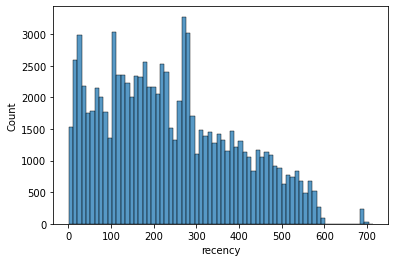

In [81]:
#Может поделить по году или полугодию?
sns.histplot(rfm, x='recency')

In [82]:
rfm.recency.quantile(q=[0.3, 0.7])

0.3    134.0
0.7    312.0
Name: recency, dtype: float64

In [83]:
rfm.frequency.describe()

count    93336.000000
mean         1.033417
std          0.209098
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: frequency, dtype: float64

In [84]:
rfm.frequency.value_counts()

1     90536
2      2572
3       181
4        28
5         9
6         5
7         3
15        1
9         1
Name: frequency, dtype: int64

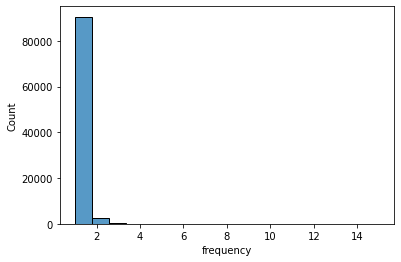

In [85]:
#не удивляемся графику, мы уже давно поняли, что наши пользователи, в основном, совершают по 1 покупке
#поделить по 1 - норм, 2 - редко и тд?
sns.histplot(rfm, x='frequency')

In [86]:
rfm.monetary.describe()

count    93336.000000
mean       141.621663
std        215.714143
min          0.850000
25%         47.650000
50%         89.700000
75%        154.692500
max      13440.000000
Name: monetary, dtype: float64

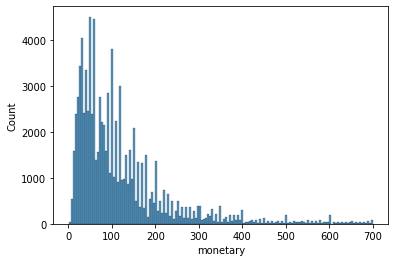

In [87]:
#Основная часть значений (порядка 90%) Monetary лежит в пределах до приблизительно 300-400. деление будем делать от этой цифры
sns.histplot(rfm[rfm.monetary < 700], x='monetary')

### Таким образом, деление будет следующее: 
    Recency: 1 - больше 350 дней, 2 - 220-350 дней, 3 - 115-220 дней, 4 - меньше 115 дней 
    Frequency: 1 - 1 покупка, 2 - 2 покупки, 3 - 3-4 покупки, 4 - больше 4 покупок 
    Monetary: 1 - до 90, 2 - от 90 до 155, 3 - от 155 до 300, 4 - больше 300

In [88]:
#строим все границы

In [89]:
def r_score(x):
    if x <= 115:
        return 4
    elif x <= 220:
        return 3
    elif x <= 350:
        return 2
    else:
        return 1
    
    
def f_score(x):
    if x > 4:
        return 4
    elif x > 2:
        return 3
    elif x > 1:
        return 2
    else:
        return 1  
    
    
def m_score(x):
    if x >= 300:
        return 4
    elif x >= 155:
        return 3
    elif x >= 90:
        return 2
    else:
        return 1 

In [90]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))

In [92]:
#Наконец, я объединяю оценки R, F и M в файл RFM Score.
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,2,412
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,3,213


In [93]:
#Опишем наши результаты,с помощью сегментов
pd.set_option('display.max_colwidth', None)

description = pd.DataFrame({'Segment' : ['new_a_lot', 'fav', 'potential', 
                                         'long_ago', 'keep', 'return', 'non active', 'new'],
                           'Description' : ['Покупали недавно и много',
                                           'Покупают много, но не так часто',
                                           'Покупали недавно и могут покупать чаще',
                                           'Требуют внимания, совершили 1 покупку, но не очень давно',
                                           'Нужно удержать',
                                           'Нужно вернуть',
                                           'Неактивные',
                                           'Новые']})
description

,Segment,Description
0,new_a_lot,Покупали недавно и много
1,fav,"Покупают много, но не так часто"
2,potential,Покупали недавно и могут покупать чаще
3,long_ago,"Требуют внимания, совершили 1 покупку, но не очень давно"
4,keep,Нужно удержать
5,return,Нужно вернуть
6,non active,Неактивные
7,new,Новые


In [94]:
segt_map = {
    r'[1-2][1-2]': 'non active',
    r'1[3-4]': 'return',  
    r'2[3-4]': 'keep',
    r'3[3-4]': 'fav',
    r'31': 'long_ago',
    r'41': 'new',
    r'[3-4]2': 'potential',
    r'4[3-4]': 'new_a_lot'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,2,412,new
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,4,1,1,411,new
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,1,111,non active
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211,non active
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,3,213,non active


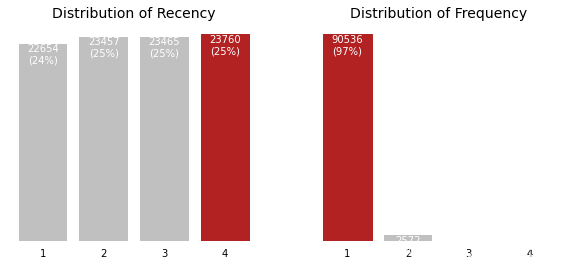

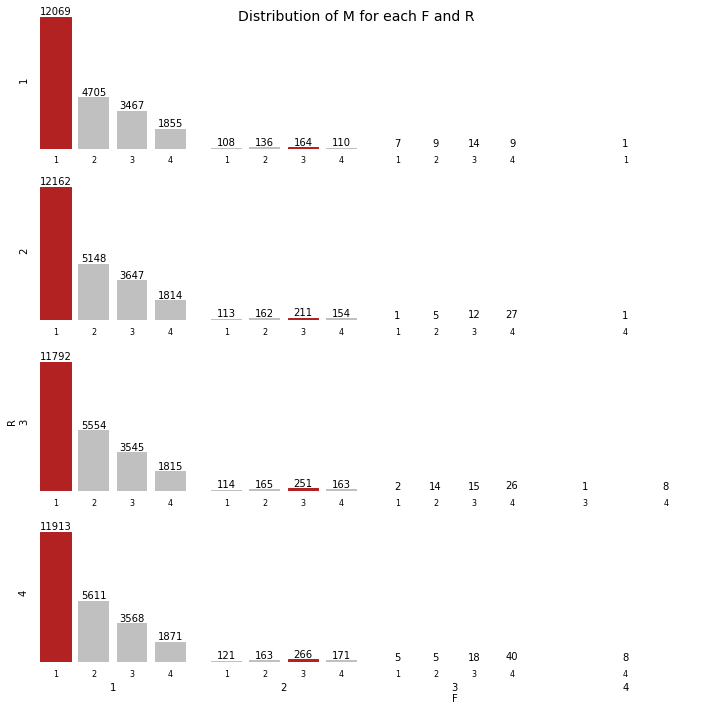

In [95]:
#Визуализируем
#Теперь, когда у нас есть оценки, мы можем визуализировать данные, чтобы лучше понять портфолио наших клиентов. Во-первых, давайте посмотрим на распределение R, F и M.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))


for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=4, ncols=4,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 5)
f_range = range(1, 5)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 4:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

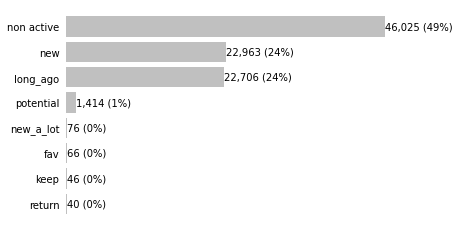

In [96]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['liders', 'loyal']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

 Большинство пользователей неактивные, но довольно значительное количество попало в группы новых и требующих внимания. 
Лояльных пользователей совсем немного. 
 В целом по результатам всех исследований можно предположить, что магазин продает товары, которые редко покупаются 
несколько раз в силу какой-то своей специфики, поскольку возвращаемость клиентов и их лояльность находятся 
в околонулевых значениях

## Выводы:
       Большое кол-во пользователь неактивные (порядка 46%), это связано, хочется верить, со спецификой нашего бизнеса
       Видим, что новые пользователи все-таки приходят к нам
       А вот "лучших" покупателей в процентах мы смотреть конечно не будем с; т.к.купили недавно и много вчего 76 человеку, много, но давненько - 66     